# Predicting the severity of a car accident


## Introduction

The number of annual road traffic deaths has reached 1.35 million worldwide[^1]. Road traffic injuries are the first cause of death of people aged 5-29 years. Every 24 seconds someone dies on the road. Those numbers are astonishingly high but there is another cost of these accidents : the medical costs for the survivors. Injured people often need medical care wheareas for short or long term injuries. The economic consequences of motor vehicle crashes have been estimated between 1% and 3% of the respective GNP of the world countries, reaching a total over $500 billion [^2]

This project aims to determine if we can predict the severity of a car accident using features as date, time, location, weather conditions and road conditions.

### Interests

If such a prediction is possible, we may be able to find a correlation between the severity and a specific feature which could lead to improve the roads safety. Addressing this problem the right way, whereas it is prevention messages, adding traffic signage or redesigning roads would mean less road traffic injuries and less money spent on medical care. For a government or local authority taking care of the medical bill, it means they could spend this budget for other purposes.

## Data

### Data source

The dataset used is the US Accidents (3.5 million records)[^3] dataset from Kaggle.

### Description

This dataset contains accident data covering 49 states of the USA. It has been collected from February 2016 and June 2020 using multiple Traffic APIs. It contains features as start and end time, location, weather conditions and road conditions

## Exploring the dataset

In [2]:
import pandas as pd
import numpy as np

# getting the data
data = pd.read_csv("US_Accidents_June20.csv")

In [1]:
data.head()

NameError: name 'data' is not defined

In [3]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Cleaning the dataset

In [3]:
# dropping the columns that won't be used
del data['ID']
del data['Source']
del data['TMC']
del data['End_Lat']
del data['End_Lng']
del data['Distance(mi)']
del data['Description']
del data['Number']
del data['Street']
del data['Side']
del data['City']
del data['County']
del data['State']
del data['Zipcode']
del data['Country']
del data['Timezone']
del data['Airport_Code']
del data['Weather_Timestamp']
del data['Wind_Chill(F)']
del data['Wind_Direction']
del data['Wind_Speed(mph)']
del data['Precipitation(in)']
del data['Sunrise_Sunset']
del data['Civil_Twilight']
del data['Nautical_Twilight']
del data['Astronomical_Twilight']

data.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

In [4]:
# renaming the columns
data.columns = ['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 
                'Temperature', 'Humidity', 'Pressure', 'Visibility', 'Weather_Condition', 
                'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 
                'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

In [6]:
# Changing the weather condition with an int value
data['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [7]:
data['Weather_Condition'].nunique()

127

In [5]:
data = data.replace(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle',
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow', 'Heavy Snow', 'Low Drifting Snow',
       'Light Ice Pellets', 'Ice Pellets', 'Squalls', 'N/A Precipitation',
       'Cloudy / Windy', 'Light Fog', 'Sand', 'Snow Grains',
       'Snow Showers', 'Heavy Thunderstorms and Snow', 'Rain / Windy',
       'Heavy Rain / Windy', 'Heavy Ice Pellets', 'Light Snow / Windy',
       'Heavy Freezing Rain', 'Small Hail', 'Heavy Rain Showers',
       'T-Storm / Windy', 'Patches of Fog / Windy', 'Drizzle / Windy',
       'Thunder / Windy', 'Wintry Mix', 'Squalls / Windy', 'Rain Shower',
       'Drizzle and Fog', 'Haze / Windy', 'Sand / Dust Whirlwinds',
       'Blowing Dust', 'Fog / Windy', 'Smoke / Windy',
       'Wintry Mix / Windy', 'Snow / Windy', 'Light Rain Shower / Windy',
       'Heavy Snow / Windy', 'Snow and Sleet',
       'Light Freezing Rain / Windy', 'Light Drizzle / Windy',
       'Light Snow and Sleet', 'Partial Fog', 'Light Snow Shower',
       'Light Snow and Sleet / Windy', 'Freezing Rain',
       'Blowing Snow / Windy', 'Freezing Drizzle', 'Sleet', 'Light Sleet',
       'Rain and Sleet', 'Heavy Sleet', 'Light Snow Grains',
       'Partial Fog / Windy', 'Light Snow with Thunder',
       'Widespread Dust / Windy', 'Sand / Dust Whirlwinds / Windy',
       'Tornado', 'Snow and Thunder', 'Snow and Sleet / Windy',
       'Heavy Snow with Thunder', 'Thunder / Wintry Mix / Windy',
       'Light Snow Showers', 'Heavy Blowing Snow', 'Light Hail',
       'Heavy Smoke', 'Heavy Thunderstorms with Small Hail',
       'Light Thunderstorm', 'Heavy Freezing Drizzle',
       'Light Blowing Snow', 'Thunderstorms and Snow',
       'Freezing Rain / Windy', 'Dust Whirls',
       'Sand / Dust Whirls Nearby', 'Heavy Rain Shower',
       'Thunder and Hail', 'Drifting Snow', 'Thunder and Hail / Windy'], 
             list(range(127))) 


In [9]:
# count missing values
len(data.index)-data.count()

Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Temperature          65736
Humidity             69691
Pressure             55884
Visibility           75861
Weather_Condition    76143
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
dtype: int64

In [10]:
# compute percentage of missing values
data.isnull().sum() / len(data.index) * 100

Severity             0.000000
Start_Time           0.000000
End_Time             0.000000
Start_Lat            0.000000
Start_Lng            0.000000
Temperature          1.870827
Humidity             1.983385
Pressure             1.590442
Visibility           2.158982
Weather_Condition    2.167007
Amenity              0.000000
Bump                 0.000000
Crossing             0.000000
Give_Way             0.000000
Junction             0.000000
No_Exit              0.000000
Railway              0.000000
Roundabout           0.000000
Station              0.000000
Stop                 0.000000
Traffic_Calming      0.000000
Traffic_Signal       0.000000
Turning_Loop         0.000000
dtype: float64

In [11]:
# Looking the repartition of missing values for Temperature group by the Severity
df2 = data.Temperature.isnull().groupby([data['Severity']]).sum().astype(int).reset_index(name='count') 
df2

,Severity,count
0,1,359
1,2,42586
2,3,20044
3,4,2747


In [12]:
# Looking the repartition of missing values for Humidity group by the Severity
df3 = data.Humidity.isnull().groupby([data['Severity']]).sum().astype(int).reset_index(name='count') 
df3

,Severity,count
0,1,381
1,2,45343
2,3,21047
3,4,2920


In [13]:
# Looking the repartition of missing values for Pressure group by the Severity
df4 = data.Pressure.isnull().groupby([data['Severity']]).sum().astype(int).reset_index(name='count') 
df4

,Severity,count
0,1,323
1,2,35942
2,3,17228
3,4,2391


In [14]:
# Looking the repartition of missing values for Visibility group by the Severity
df5 = data.Visibility.isnull().groupby([data['Severity']]).sum().astype(int).reset_index(name='count') 
df5

,Severity,count
0,1,361
1,2,47583
2,3,24581
3,4,3336


In [15]:
# Looking the repartition of missing values for Weather_Condition group by the Severity
df6 = data.Weather_Condition.isnull().groupby([data['Severity']]).sum().astype(int).reset_index(name='count') 
df6

,Severity,count
0,1,405
1,2,47680
2,3,24634
3,4,3424


In [6]:
# Dropping the rows with missing values
df = data.dropna()
df = df.reset_index(drop=True)

In [7]:
# Saving the dataframe to a file
df.to_csv(r'df.csv')

In [1]:
import pandas as pd
import numpy as np

# getting the data
df = pd.read_csv("df.csv")

## Getting a balanced dataset

In [6]:
# Counting the repartition of data by Severity
df['Severity'].value_counts()

2    2308125
3     966576
4     107810
1      28703
Name: Severity, dtype: int64

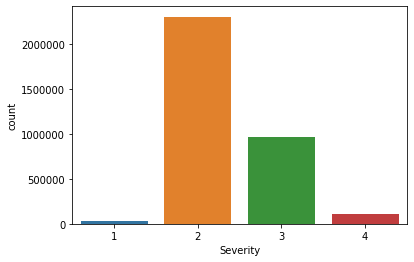

In [7]:
# Ploting the repartition of data by Severity

import seaborn as sns
ax=sns.countplot(x='Severity', data=df)

In [8]:
pip install imblearn

You should consider upgrading via the '/Users/cecilehuibonhoa/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
# we adapt some data in order to feed SMOTEENN
X = df.copy()
y = df['Severity']

X['Start_Time'] = pd.to_datetime(X['Start_Time']).astype(np.int64)
X['End_Time'] = pd.to_datetime(X['End_Time']).astype(np.int64)
X.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature,Humidity,Pressure,Visibility,Weather_Condition,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,3,1454910360000000000,1454929200000000000,39.865147,-84.058723,36.9,91.0,29.68,10.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,1454911679000000000,1454913479000000000,39.928059,-82.831184,37.9,100.0,29.65,10.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1454914167000000000,1454915967000000000,39.063148,-84.032608,36.0,100.0,29.67,10.0,1.0,...,False,False,False,False,False,False,False,False,True,False
3,3,1454916214000000000,1454918014000000000,39.747753,-84.205582,35.1,96.0,29.64,9.0,2.0,...,False,False,False,False,False,False,False,False,False,False
4,2,1454917147000000000,1454918947000000000,39.627781,-84.188354,36.0,89.0,29.65,6.0,2.0,...,False,False,False,False,False,False,False,False,True,False


### Using Random Undersampling to undersampling

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)
X_under_res, y_under_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under_res))

Resampled dataset shape Counter({1: 28703, 2: 28703, 3: 28703, 4: 28703})


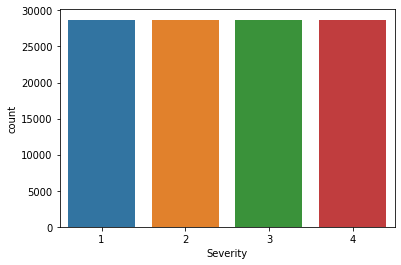

In [18]:
import seaborn as sns
# Ploting the repartition of data by Severity

ax=sns.countplot(x='Severity', data=X_under_res)

In [19]:
# Saving the dataframe to a file
X_under_res.to_csv(r'X_under_res.csv')

In [1]:
import pandas as pd
import numpy as np

# getting the data
X_under_res = pd.read_csv("X_under_res.csv")

## Finding correlation

<p3>Pearson Correlation</p>

<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

In [20]:
X_under_res.corr()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature,Humidity,Pressure,Visibility,Weather_Condition,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,-0.448116,-0.447890,0.156789,0.229017,-0.211025,0.226644,0.220909,-0.041950,-0.251865,...,-0.001054,0.045516,-0.013363,-0.040865,-0.003960,-0.061094,-0.026898,-0.006976,-0.318141,NaN
Start_Time,-0.448116,1.000000,0.999891,-0.056955,-0.105179,0.105664,-0.166047,-0.373558,0.015477,0.476955,...,-0.002036,-0.012696,0.015681,0.033677,-0.002159,0.031727,0.004435,0.004946,0.206564,NaN
End_Time,-0.447890,0.999891,1.000000,-0.056799,-0.105130,0.105582,-0.166051,-0.373636,0.015514,0.476950,...,-0.002047,-0.012715,0.015674,0.033659,-0.002161,0.031696,0.004411,0.004941,0.206468,NaN
Start_Lat,0.156789,-0.056955,-0.056799,1.000000,-0.037750,-0.441064,0.101604,0.019089,-0.050141,-0.085759,...,0.003009,0.022118,-0.004613,-0.001518,0.000799,0.051108,0.026781,0.009861,-0.134699,NaN
Start_Lng,0.229017,-0.105179,-0.105130,-0.037750,1.000000,-0.089154,0.244995,0.203996,-0.064800,-0.136091,...,0.013694,-0.038976,-0.019053,-0.040003,-0.000481,-0.053229,-0.054172,-0.010809,-0.058084,NaN
Temperature,-0.211025,0.105664,0.105582,-0.441064,-0.089154,1.000000,-0.428459,-0.126881,0.202060,0.165970,...,0.001103,-0.033966,0.017371,0.022939,-0.000553,0.009218,-0.002620,-0.002657,0.184230,NaN
Humidity,0.226644,-0.166047,-0.166051,0.101604,0.244995,-0.428459,1.000000,0.316759,-0.368573,-0.283569,...,0.003376,0.050530,-0.032081,-0.020534,-0.003039,-0.008920,-0.017666,0.005728,-0.242303,NaN
Pressure,0.220909,-0.373558,-0.373636,0.019089,0.203996,-0.126881,0.316759,1.000000,-0.046230,-0.283659,...,0.002016,0.055770,-0.026670,0.000244,0.000193,0.024811,-0.007351,0.000284,-0.225015,NaN
Visibility,-0.041950,0.015477,0.015514,-0.050141,-0.064800,0.202060,-0.368573,-0.046230,1.000000,0.077707,...,0.002843,-0.013040,0.023920,0.002851,0.001641,0.011202,0.007183,0.007750,0.062813,NaN
Weather_Condition,-0.251865,0.476955,0.476950,-0.085759,-0.136091,0.165970,-0.283569,-0.283659,0.077707,1.000000,...,-0.001446,-0.023353,0.013604,0.014179,-0.001906,0.007176,0.010370,-0.001360,0.153530,NaN


We can see there is not a single feature with a high correlation coefficient indicating a relationship with the severity of an accident

### Multiple Linear Regression

We are going to use the meteorological variables to see if they have a correlation with the severity of an accident.
In order to do that, we will develop a model using the following variables as the predictor variables : 'Temperature','Humidity','Pressure', 'Visibility' and 'Weather_Condition'

In [35]:
meteorological_vars = X_under_res[['Temperature','Humidity','Pressure', 'Visibility', 'Weather_Condition']]

Fit the linear model using the five above-mentioned variables.

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(meteorological_vars, X_under_res['Severity'])

LinearRegression()

We now look at the value of the intercept(a)

In [37]:
lm.intercept_

-1.1808342785970751

And the values of the coefficients (b1, b2, b3, b4)

In [38]:
lm.coef_

array([-0.00798254,  0.00426255,  0.13471818,  0.015748  , -0.01804865])

### Model Evaluation using Visualization

In [39]:
Y_hat = lm.predict(meteorological_vars)

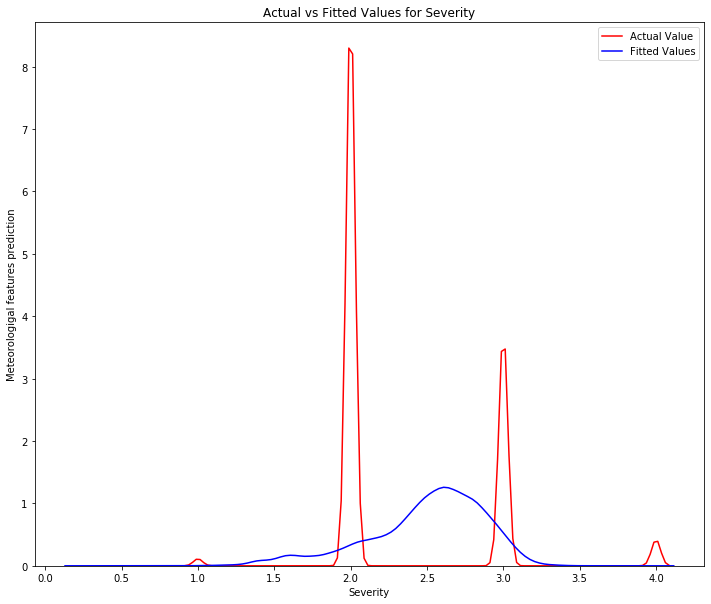

In [40]:
# import the visualization package: seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Severity'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Severity')
plt.xlabel('Severity')
plt.ylabel('Meteorologigal features prediction')

plt.show()
plt.close()

We can see the fitted values don't follow the actual values 

### Model development

We will try 2 different classification models :
* KNN
* Decision Tree



#### K-Nearest Neighbors 

Let's start with KNN.

K-Nearest Neighbors is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

In [21]:
from sklearn.model_selection import train_test_split

X = X_under_res[['Temperature','Humidity','Pressure', 'Visibility', 'Weather_Condition']]
y = X_under_res['Severity']


In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (91849, 5) (91849,)
Test set: (22963, 5) (22963,)


We calculate the accuracy of KNN for different Ks.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.42799286, 0.40922353, 0.40399774, 0.40134129, 0.40025258,
       0.40033968, 0.3958542 , 0.39428646, 0.39433001])

Plot model accuracy for Different number of Neighbors

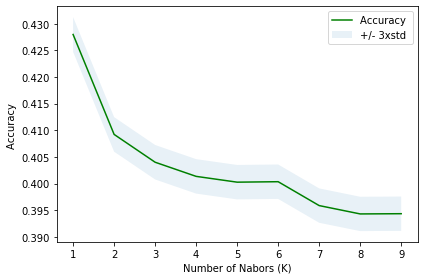

In [28]:
import matplotlib.pyplot as plt

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [29]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.4279928580760354 with k= 1


#### Decision Tree

The basic intuition behind a decision tree is to map out all possible decision paths in the form of a tree

* Each internal node corresponds to a test
* Each branch corresponds to a result of the test
* Each leaf node assigns a classification

We will first create an instance of the DecisionTreeClassifier called severityTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [30]:
from sklearn.tree import DecisionTreeClassifier

severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
severityTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

We will reuse the same train test split as the ones used for the KNN

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
# print ('Train set:', X_train.shape,  y_train.shape)
# print ('Test set:', X_test.shape,  y_test.shape)

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [31]:
severityTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [32]:
predTree = severityTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[3 1 1 3 3]
54700    2
4784     1
10209    1
19087    1
96485    4
Name: Severity, dtype: int64


Next, let's import metrics from sklearn and check the accuracy of our model.

In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.403257414100945


Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

Lets visualize the tree

In [34]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [41]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

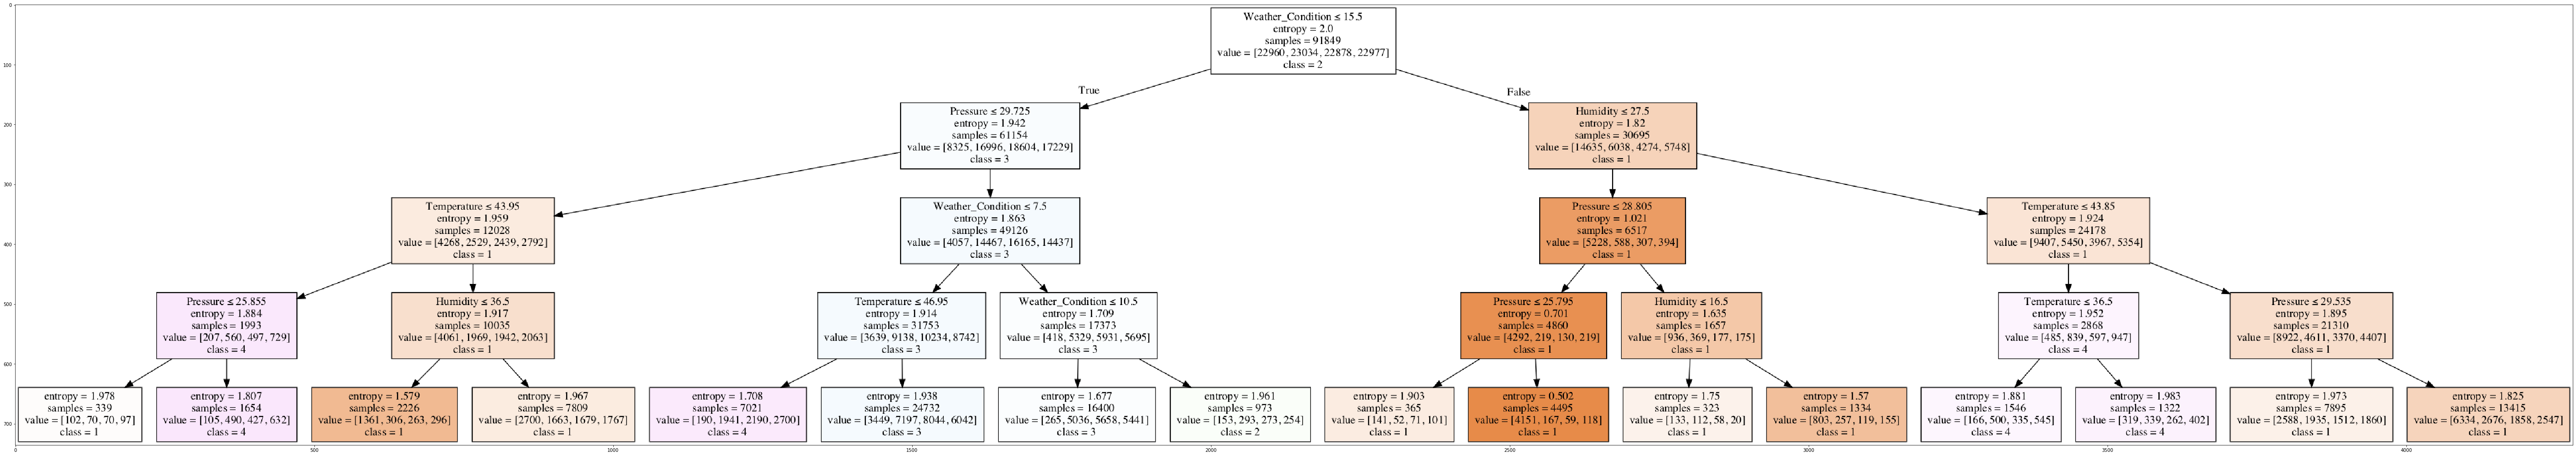

In [43]:
dot_data = StringIO()
filename = "severityTree.png"
featureNames = X.columns[0:5]
targetNames = X_under_res['Severity'].unique().tolist()
out=tree.export_graphviz(severityTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train).astype(str), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')